In [1]:
#Q1
import plotly.express as px
import pandas as pd
penguins = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

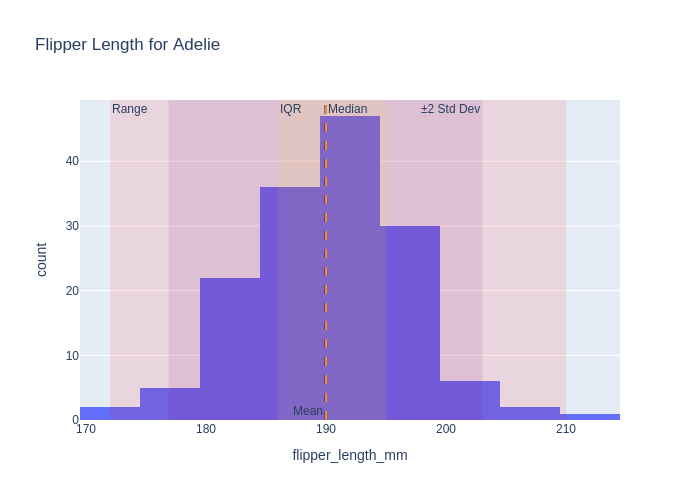

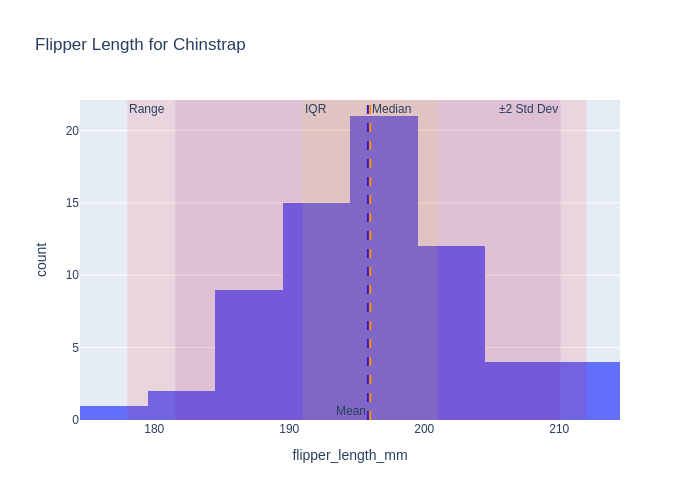

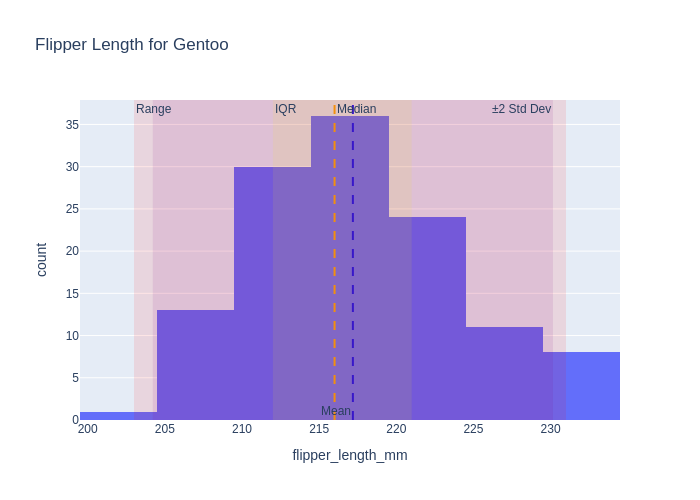

In [2]:
#Q1
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import pandas as pd

# Load the penguins dataset
penguins = sns.load_dataset('penguins')

# Function to add lines and rectangles to the histogram
def add_markings(fig, species_data):
    mean = species_data['flipper_length_mm'].mean()
    median = species_data['flipper_length_mm'].median()
    std_dev = species_data['flipper_length_mm'].std()
    min_val = species_data['flipper_length_mm'].min()
    max_val = species_data['flipper_length_mm'].max()
    q1 = species_data['flipper_length_mm'].quantile(0.25)
    q3 = species_data['flipper_length_mm'].quantile(0.75)
    
    # Add mean and median lines with annotations
    fig.add_vline(x=mean, line=dict(color='blue', dash='dash'), annotation_text='Mean', annotation_position='bottom left')
    fig.add_vline(x=median, line=dict(color='orange', dash='dash'), annotation_text='Median', annotation_position='top right')
    
    # Add range rectangle
    fig.add_vrect(x0=min_val, x1=max_val, fillcolor='red', opacity=0.1, line_width=0, annotation_text='Range', annotation_position='top left')
    
    # Add interquartile range rectangle
    fig.add_vrect(x0=q1, x1=q3, fillcolor='yellow', opacity=0.1, line_width=0, annotation_text='IQR', annotation_position='top left')
    
    # Add two standard deviations range rectangle
    fig.add_vrect(x0=mean-2*std_dev, x1=mean+2*std_dev, fillcolor='purple', opacity=0.1, line_width=0, annotation_text='±2 Std Dev', annotation_position='top right')

# Create histograms for each species
for species in penguins['species'].unique():
    species_data = penguins[penguins['species'] == species]
    
    # Create a new figure for each species
    fig = px.histogram(species_data, x='flipper_length_mm', nbins = 13, title=f'Flipper Length for {species}')
    
    add_markings(fig, species_data)
    
    # Update layout to show legend
    fig.update_layout(showlegend=True)
    
    # Show the figure for the current species
    fig.show(renderer = 'png')


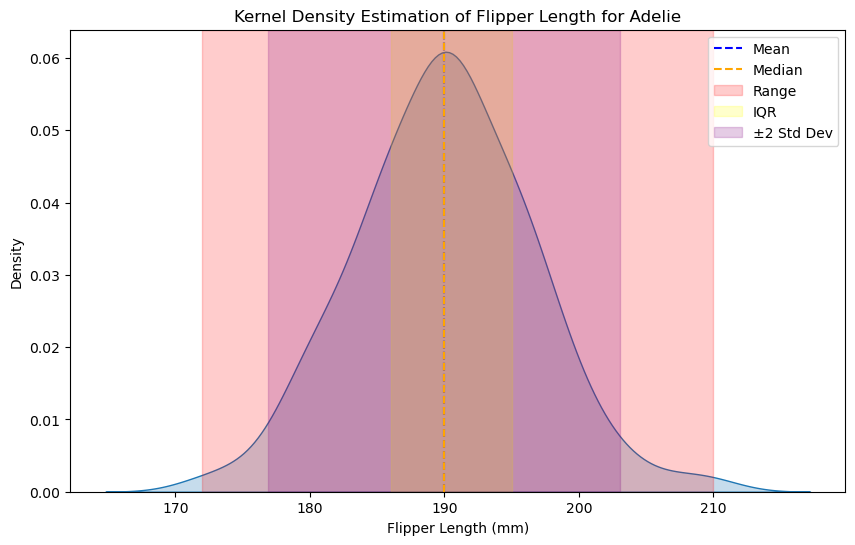

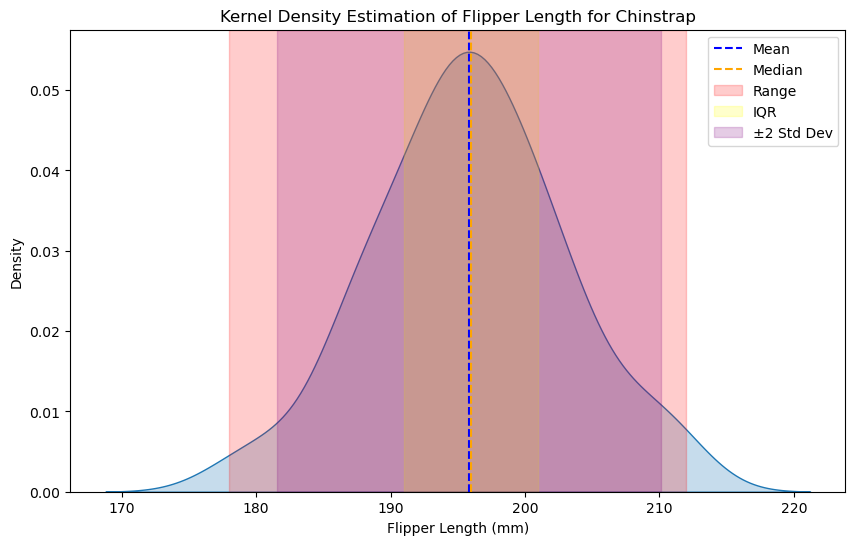

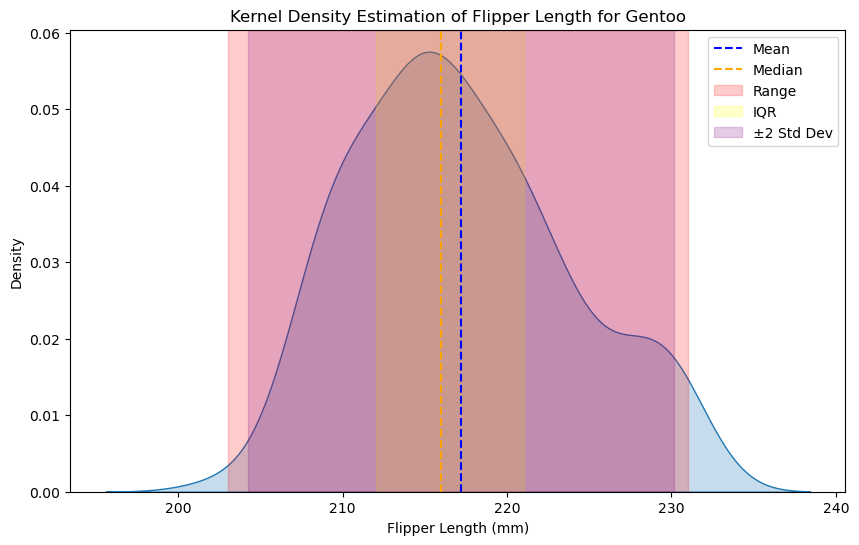

In [3]:
#Q2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the penguins dataset
penguins = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

# Function to add lines and rectangles to the KDE plot
def add_markings(ax, species_data):
    mean = species_data['flipper_length_mm'].mean()
    median = species_data['flipper_length_mm'].median()
    std_dev = species_data['flipper_length_mm'].std()
    min_val = species_data['flipper_length_mm'].min()
    max_val = species_data['flipper_length_mm'].max()
    q1 = species_data['flipper_length_mm'].quantile(0.25)
    q3 = species_data['flipper_length_mm'].quantile(0.75)
    
    # Add mean and median lines
    ax.axvline(mean, color='blue', linestyle='--', label='Mean')
    ax.axvline(median, color='orange', linestyle='--', label='Median')
    
    # Add range rectangle
    ax.axvspan(min_val, max_val, color='red', alpha=0.2, label='Range')
    
    # Add interquartile range rectangle
    ax.axvspan(q1, q3, color='yellow', alpha=0.2, label='IQR')
    
    # Add two standard deviations range rectangle
    ax.axvspan(mean-2*std_dev, mean+2*std_dev, color='purple', alpha=0.2, label='±2 Std Dev')

# Create KDE plots for each species
for species in penguins['species'].unique():
    species_data = penguins[penguins['species'] == species]
    
    plt.figure(figsize=(10, 6))
    
    # Create a KDE plot for each species
    sns.kdeplot(species_data['flipper_length_mm'], fill=True)
    
    add_markings(plt.gca(), species_data)
    
    plt.title(f'Kernel Density Estimation of Flipper Length for {species}')
    plt.xlabel('Flipper Length (mm)')
    plt.ylabel('Density')
    
    # Show legend
    plt.legend()
    
    # Show the plot for the current species
    plt.show()
    


Q3

Out of the three statistical models, I prefer the histogram. The histogram is the simplest to interpret general data from. The general shape of the histogram can show the approximate distribution of the data set. Its also easier to extract statistical information from, like the mean, median or standard deviation, since everything is grouped together. The histogram, unlike the box plot, can also show when a data set is not normally distributed when there are several peaks in the graph.

Thank you for pointing that out! Here’s a revised summary of our interaction, focusing solely on the topics we discussed:

---

### Summary of Interaction

In our conversation, we explored various statistical data visualization techniques, specifically focusing on histograms, kernel density estimators (KDEs), and box plots.

1. **Data Visualization Techniques**:
   - You inquired about using Plotly to create histograms with specific statistical markers (mean, median, range, interquartile range, and standard deviations) for the penguins dataset.
   - We discussed the differences between histograms, KDEs, and box plots. You highlighted that histograms group data into bins, while KDEs provide a smooth representation of individual data points, and box plots summarize statistical quantities.

2. **Pros and Cons**: I provided a pros and cons list for each type of visualization, emphasizing their strengths and weaknesses in conveying data insights.

3. **Conclusion**: The conversation highlighted the importance of choosing the right visualization technique based on the data and the insights one wishes to convey.

---

Feel free to adjust any part of this summary as needed! If you have any more questions or need further assistance, just let me know! 😊

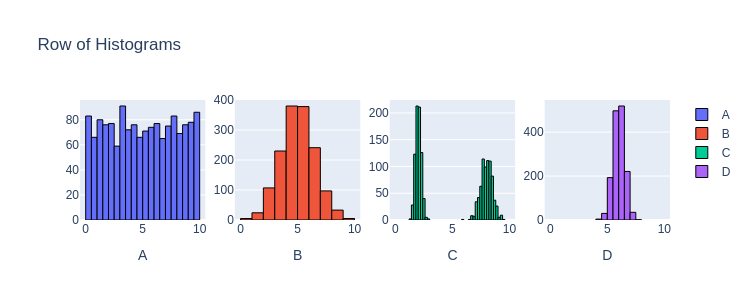

In [3]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show(renderer = 'png') # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

Q4
1) A and C have similar means and variances
2) A and B, B and C, A and D have similar means but different variances.
3) None have similar variances but different means.
4) B and D, C and D all have different means and different variances.